In [49]:
# Import necessary libraries
import numpy as np  # Numerical computing library
import pandas as pd  # Data manipulation library
import seaborn as sns  # Data visualization library
from matplotlib import pyplot as plt  # Plotting library
import time  # Time-related functions
from sklearn.preprocessing import LabelEncoder  # Preprocessing module for label encoding
from sklearn.model_selection import train_test_split  # Splitting dataset into train and test sets
from sklearn import metrics  # Module for various evaluation metrics
from sklearn.metrics import accuracy_score  # Function to calculate accuracy score
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_squared_error, r2_score, accuracy_score  # Evaluation metrics
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier

In [50]:
# Read the CSV file containing COVID dataset into a pandas DataFrame
covid_data = pd.read_csv("Covid Dataset.csv")

In [51]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [52]:
covid_data.shape

(5434, 21)

In [53]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [54]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [55]:
# Generate descriptive statistics of the COVID dataset and transpose the result
covid_data.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [56]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [57]:
# Calculate the number of missing values for each column in the COVID dataset
missing_values = covid_data.isnull().sum()

# Calculate the percentage of missing values for each column in the COVID dataset
percent_missing = covid_data.isnull().sum() / covid_data.shape[0] * 100

# Create a dictionary to store the missing values and their percentages
value = {
    'missing_values ': missing_values,
    'percent_missing %': percent_missing  
}

# Create a DataFrame from the dictionary to display missing values and their percentages
frame = pd.DataFrame(value)


<Axes: >

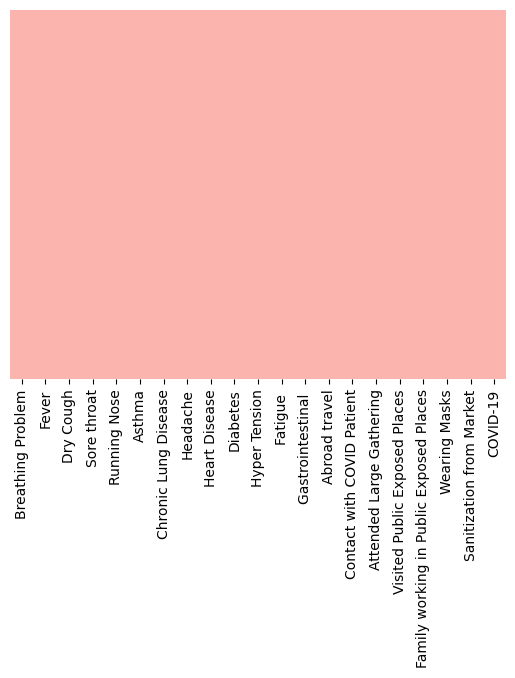

In [58]:
# Visualize missing values in the COVID dataset using a heatmap
sns.heatmap(covid_data.isnull(), yticklabels=False, cbar=False, cmap='Pastel1')

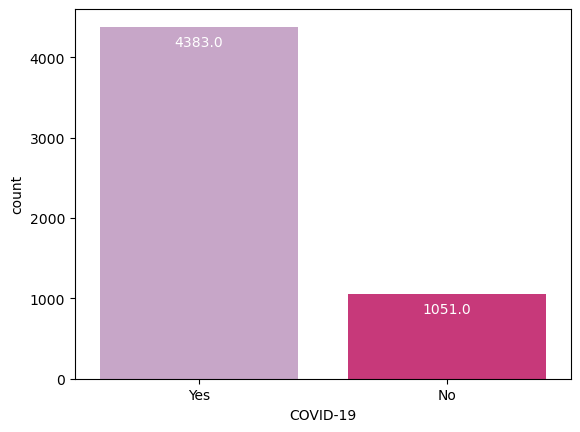

In [59]:
# Create a count plot to visualize the distribution of COVID-19 cases
ax = sns.countplot(x='COVID-19', data=covid_data, palette="PuRd")

# Annotate each bar with the count of cases
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height() + 100), ha='center', va='top', color='white', size=10)

Text(0.5, 1.0, 'Covid Positive')

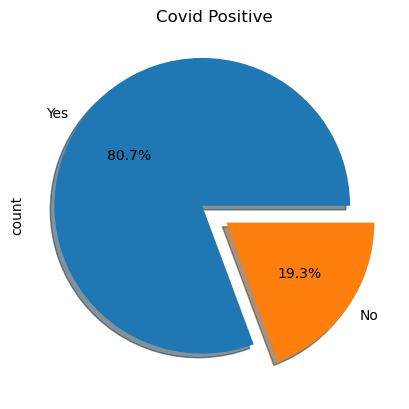

In [60]:
# Generate a pie chart to visualize the distribution of COVID-19 cases
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True)

# Add title to the pie chart
plt.title('Covid Positive')

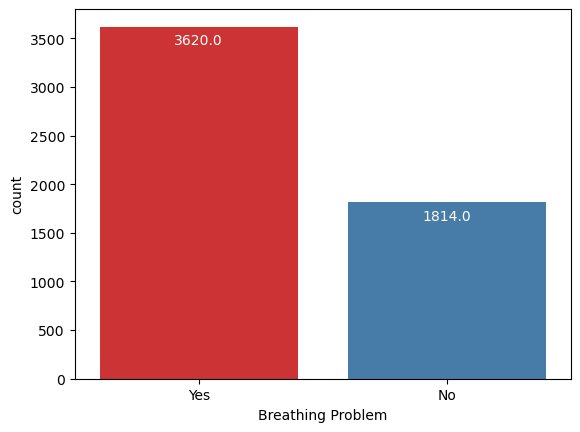

In [61]:
# Create a count plot to visualize the distribution of breathing problems
ax = sns.countplot(x='Breathing Problem', data=covid_data, palette="Set1")

# Annotate each bar with the count of cases
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height() + 100), ha='center', va='top', color='white', size=10)

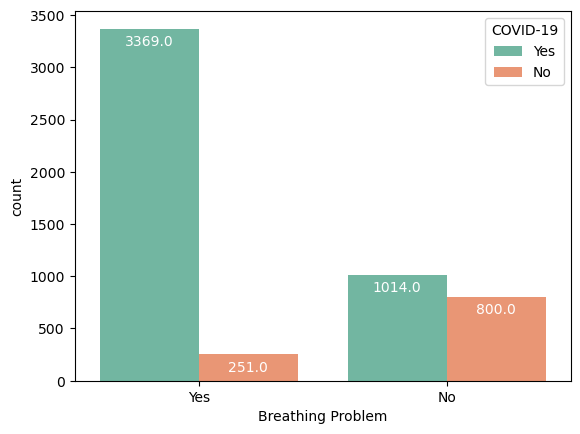

In [62]:
# Create a count plot to visualize the distribution of breathing problems with respect to COVID-19 status
ax = sns.countplot(x='Breathing Problem', hue='COVID-19', data=covid_data, palette="Set2")

# Annotate each bar with the count of cases
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height() + 100), ha='center', va='top', color='white', size=10)

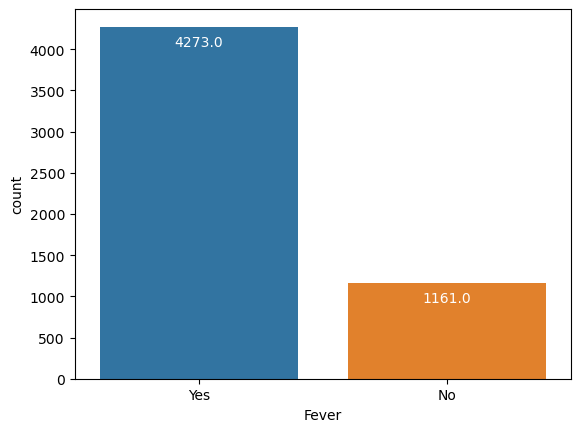

In [63]:
# Create a count plot to visualize the distribution of fever cases
ax = sns.countplot(x='Fever', data=covid_data)

# Annotate each bar with the count of cases
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height() + 100), ha='center', va='top', color='white', size=10)

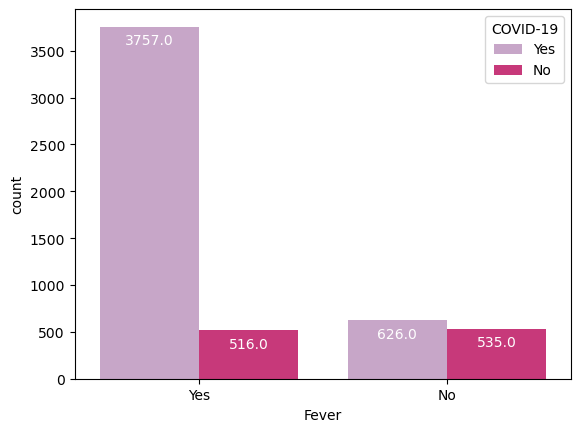

In [64]:
# Create a count plot to visualize the distribution of fever cases with respect to COVID-19 status
ax = sns.countplot(x='Fever', hue='COVID-19', data=covid_data, palette="PuRd")

# Annotate each bar with the count of cases
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height() + 100), ha='center', va='top', color='white', size=10)

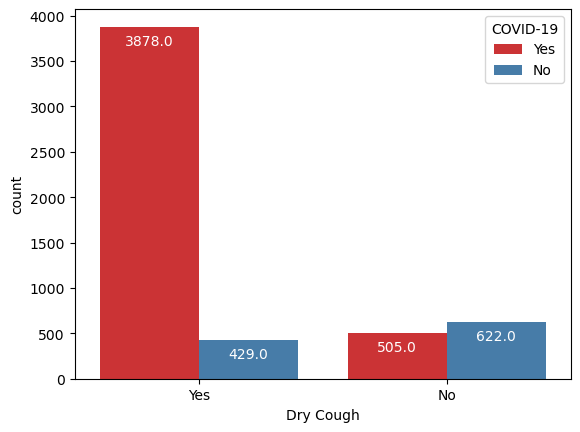

In [65]:
# Create a count plot to visualize the distribution of dry cough cases with respect to COVID-19 status
ax = sns.countplot(x='Dry Cough', hue='COVID-19', data=covid_data, palette="Set1")

# Annotate each bar with the count of cases
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height() + 100), ha='center', va='top', color='white', size=10)

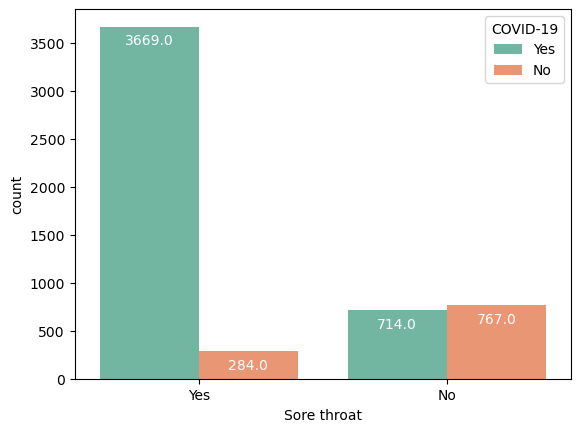

In [66]:
# Create a count plot to visualize the distribution of sore throat cases with respect to COVID-19 status
ax = sns.countplot(x='Sore throat', hue='COVID-19', data=covid_data, palette="Set2")

# Annotate each bar with the count of cases
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height() + 100), ha='center', va='top', color='white', size=10)

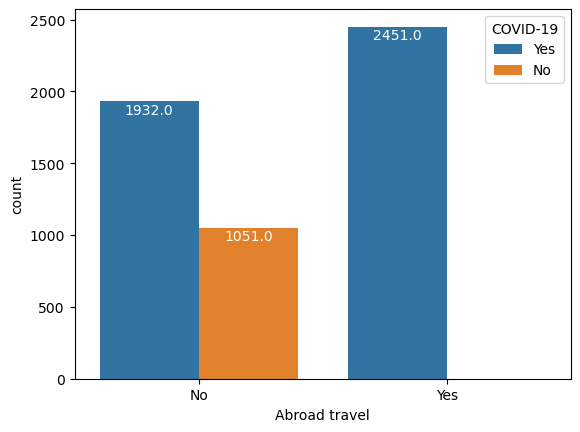

In [67]:
import seaborn as sns  # Import seaborn library for data visualization

# Create a countplot using seaborn
ax = sns.countplot(x='Abroad travel', hue='COVID-19', data=covid_data)

# Iterate over each bar in the countplot
for p in ax.patches:
    # Add annotation with the height of each bar
    ax.annotate(f'\n{p.get_height()}',  # Annotation text with bar height
                (p.get_x() + 0.2, p.get_height() + 100),  # Position of annotation
                ha='center',  # Horizontal alignment
                va='top',  # Vertical alignment
                color='white',  # Text color
                size=10)  # Text size

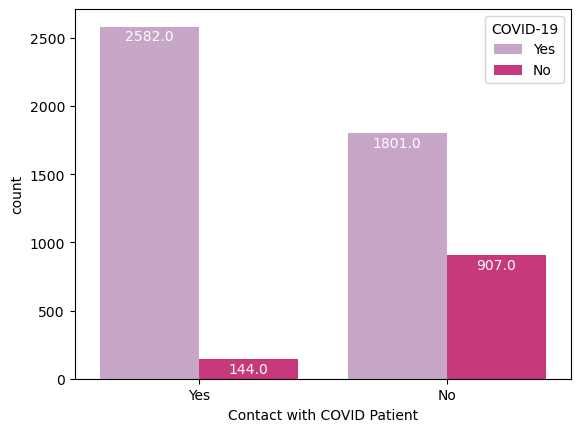

In [68]:
import seaborn as sns  # Import seaborn library for data visualization

# Create a countplot using seaborn with a specified color palette
ax = sns.countplot(x='Contact with COVID Patient', hue='COVID-19', data=covid_data, palette="PuRd")

# Iterate over each bar in the countplot
for p in ax.patches:
    # Add annotation with the height of each bar
    ax.annotate(f'\n{p.get_height()}',  # Annotation text with bar height
                (p.get_x() + 0.2, p.get_height() + 100),  # Position of annotation
                ha='center',  # Horizontal alignment
                va='top',  # Vertical alignment
                color='white',  # Text color
                size=10)  # Text size

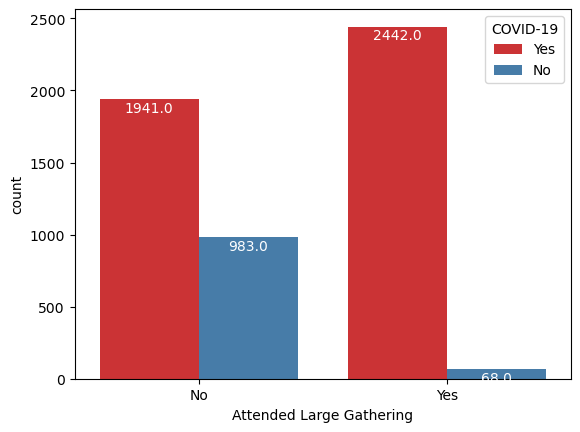

In [69]:
import seaborn as sns  # Import seaborn library for data visualization

# Create a countplot using seaborn with a specified color palette
ax = sns.countplot(x='Attended Large Gathering', hue='COVID-19', data=covid_data, palette="Set1")

# Iterate over each bar in the countplot
for p in ax.patches:
    # Add annotation with the height of each bar
    ax.annotate(f'\n{p.get_height()}',  # Annotation text with bar height
                (p.get_x() + 0.2, p.get_height() + 100),  # Position of annotation
                ha='center',  # Horizontal alignment
                va='top',  # Vertical alignment
                color='white',  # Text color
                size=10)  # Text size

In [70]:
e=LabelEncoder() # Create an instance of LabelEncoder

In [71]:
# Transforming categorical variables using LabelEncoder
covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Gastrointestinal ']=e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue ']=e.fit_transform(covid_data['Fatigue '])

In [72]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [73]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


array([[<Axes: title={'center': 'Breathing Problem'}>,
        <Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Dry Cough'}>,
        <Axes: title={'center': 'Sore throat'}>,
        <Axes: title={'center': 'Running Nose'}>],
       [<Axes: title={'center': 'Asthma'}>,
        <Axes: title={'center': 'Chronic Lung Disease'}>,
        <Axes: title={'center': 'Headache'}>,
        <Axes: title={'center': 'Heart Disease'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Hyper Tension'}>,
        <Axes: title={'center': 'Fatigue '}>,
        <Axes: title={'center': 'Gastrointestinal '}>,
        <Axes: title={'center': 'Abroad travel'}>,
        <Axes: title={'center': 'Contact with COVID Patient'}>],
       [<Axes: title={'center': 'Attended Large Gathering'}>,
        <Axes: title={'center': 'Visited Public Exposed Places'}>,
        <Axes: title={'center': 'Family working in Public Exposed Places'}>,
        <Axes: title={'center': 'We

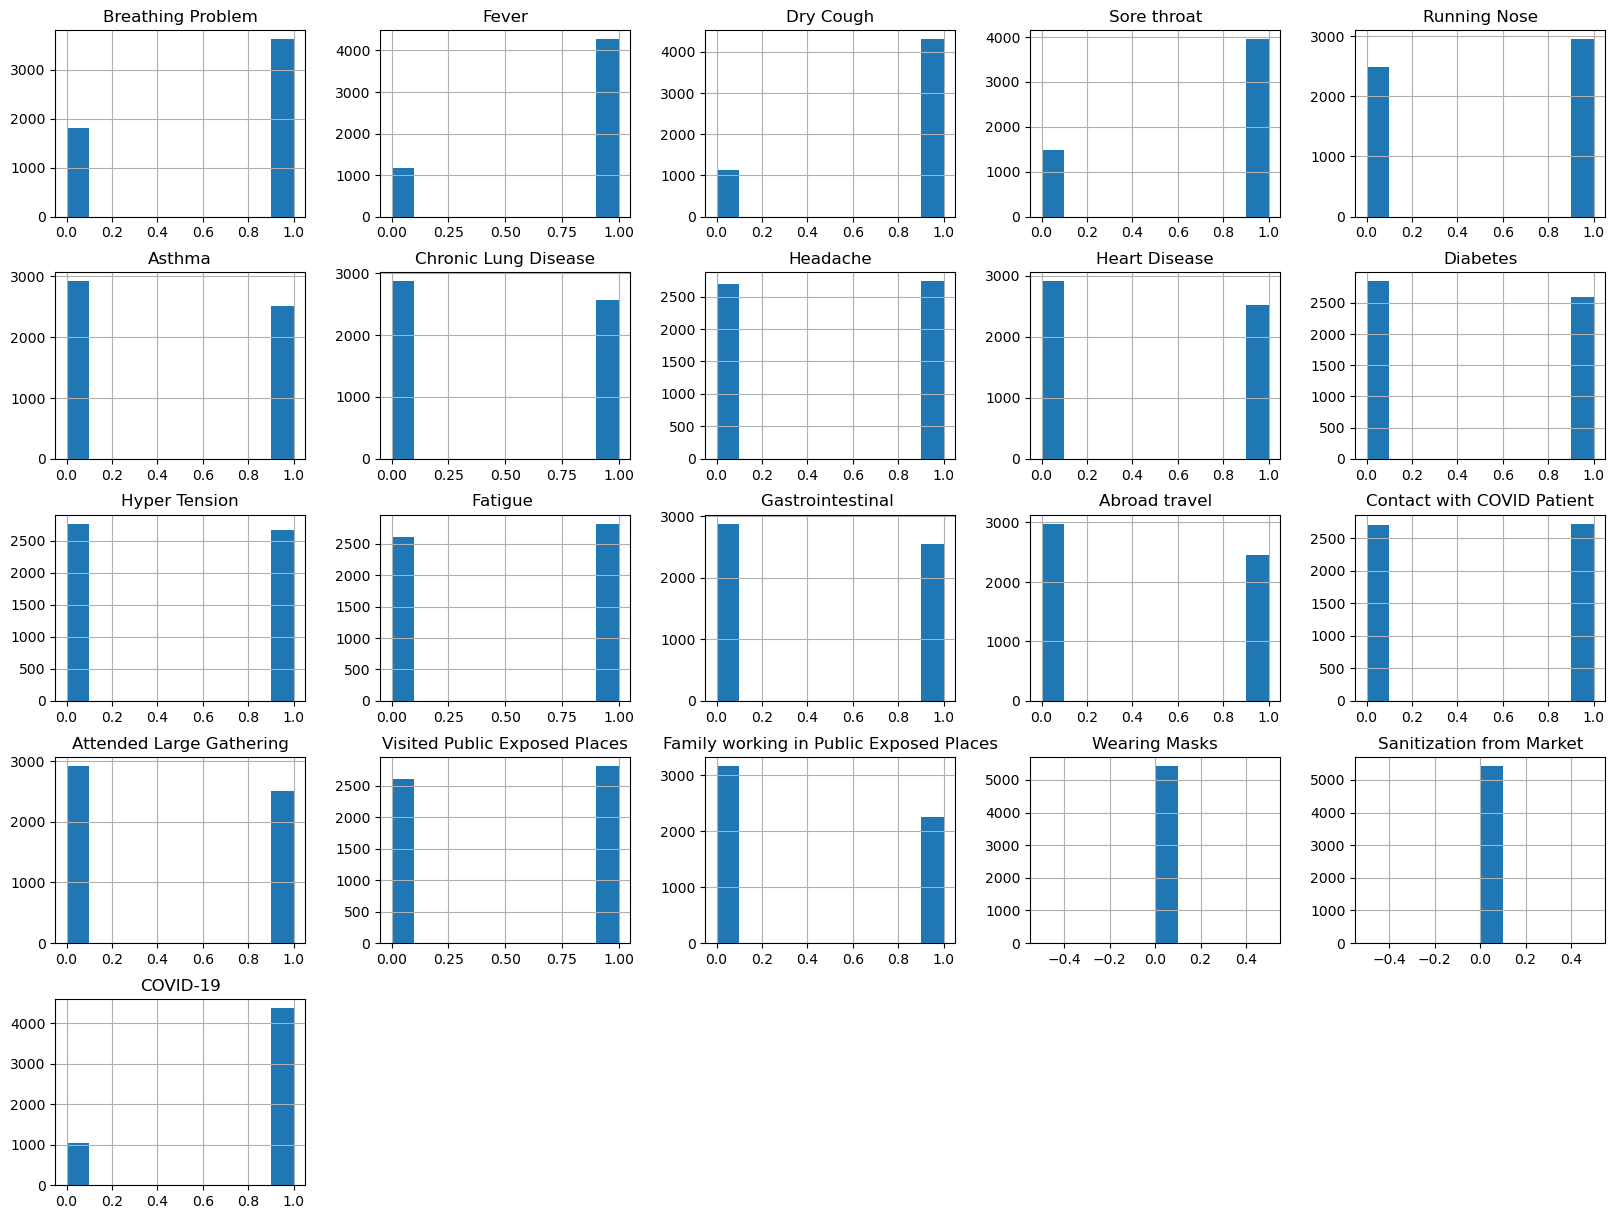

In [74]:
# Displaying histogram for COVID-19 data
# 'covid_data' is a DataFrame containing COVID-19 data
# 'hist' is a method used to generate a histogram
# figsize=(20,15) specifies the size of the figure (width, height) in inches
covid_data.hist(figsize=(20,15))

Wearing Masks
0    5434
Name: count, dtype: int64


<Axes: xlabel='Wearing Masks', ylabel='count'>

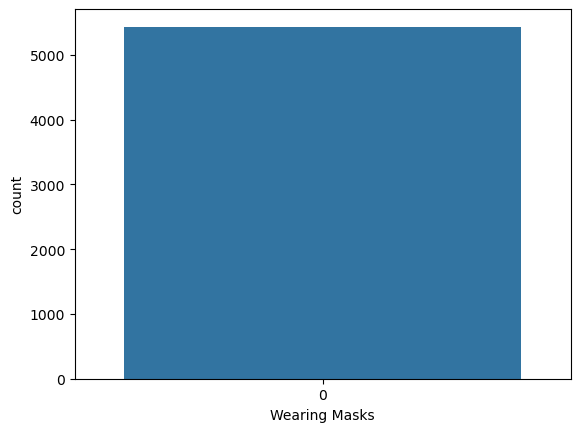

In [77]:
# Printing the counts of different values in the 'Wearing Masks' column of the COVID-19 data
# 'covid_data' is a DataFrame containing COVID-19 data
# 'value_counts()' counts the occurrences of each unique value in the specified column
print(covid_data['Wearing Masks'].value_counts())

# Creating a count plot for the 'Wearing Masks' column using seaborn
# 'sns' is an alias for seaborn library
# 'countplot' is a seaborn function to show the counts of observations in each categorical bin using bars
# x='Wearing Masks' specifies the column to be plotted on the x-axis
# data=covid_data specifies the DataFrame containing the data
sns.countplot(x='Wearing Masks', data=covid_data)

Sanitization from Market
0    5434
Name: count, dtype: int64


<Axes: xlabel='Sanitization from Market', ylabel='count'>

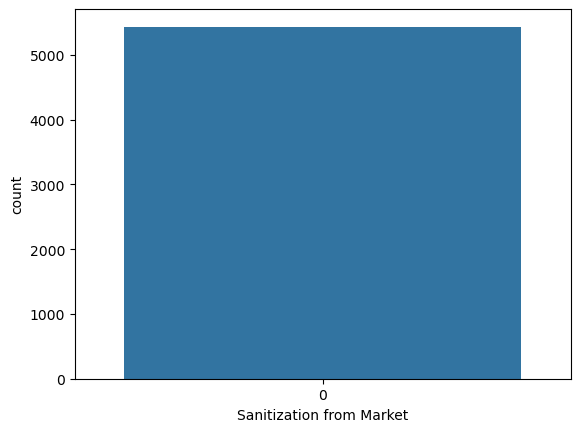

In [78]:
# Printing the counts of different values in the 'Sanitization from Market' column of the COVID-19 data
# 'covid_data' is a DataFrame containing COVID-19 data
# 'value_counts()' counts the occurrences of each unique value in the specified column
print(covid_data['Sanitization from Market'].value_counts())

# Creating a count plot for the 'Sanitization from Market' column using seaborn
# 'sns' is an alias for seaborn library
# 'countplot' is a seaborn function to show the counts of observations in each categorical bin using bars
# x='Sanitization from Market' specifies the column to be plotted on the x-axis
# data=covid_data specifies the DataFrame containing the data
sns.countplot(x='Sanitization from Market', data=covid_data)

In [79]:
# Dropping the 'Wearing Masks' column from the COVID-19 data
# 'covid_data' is a DataFrame containing COVID-19 data
# 'drop' method is used to remove columns
# 'axis=1' specifies that we are dropping a column (1 for column, 0 for row)
covid_data = covid_data.drop('Wearing Masks', axis=1)

# Dropping the 'Sanitization from Market' column from the COVID-19 data
# 'covid_data' is a DataFrame containing COVID-19 data
# 'drop' method is used to remove columns
# 'axis=1' specifies that we are dropping a column (1 for column, 0 for row)
covid_data = covid_data.drop('Sanitization from Market', axis=1)

In [80]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

<Axes: >

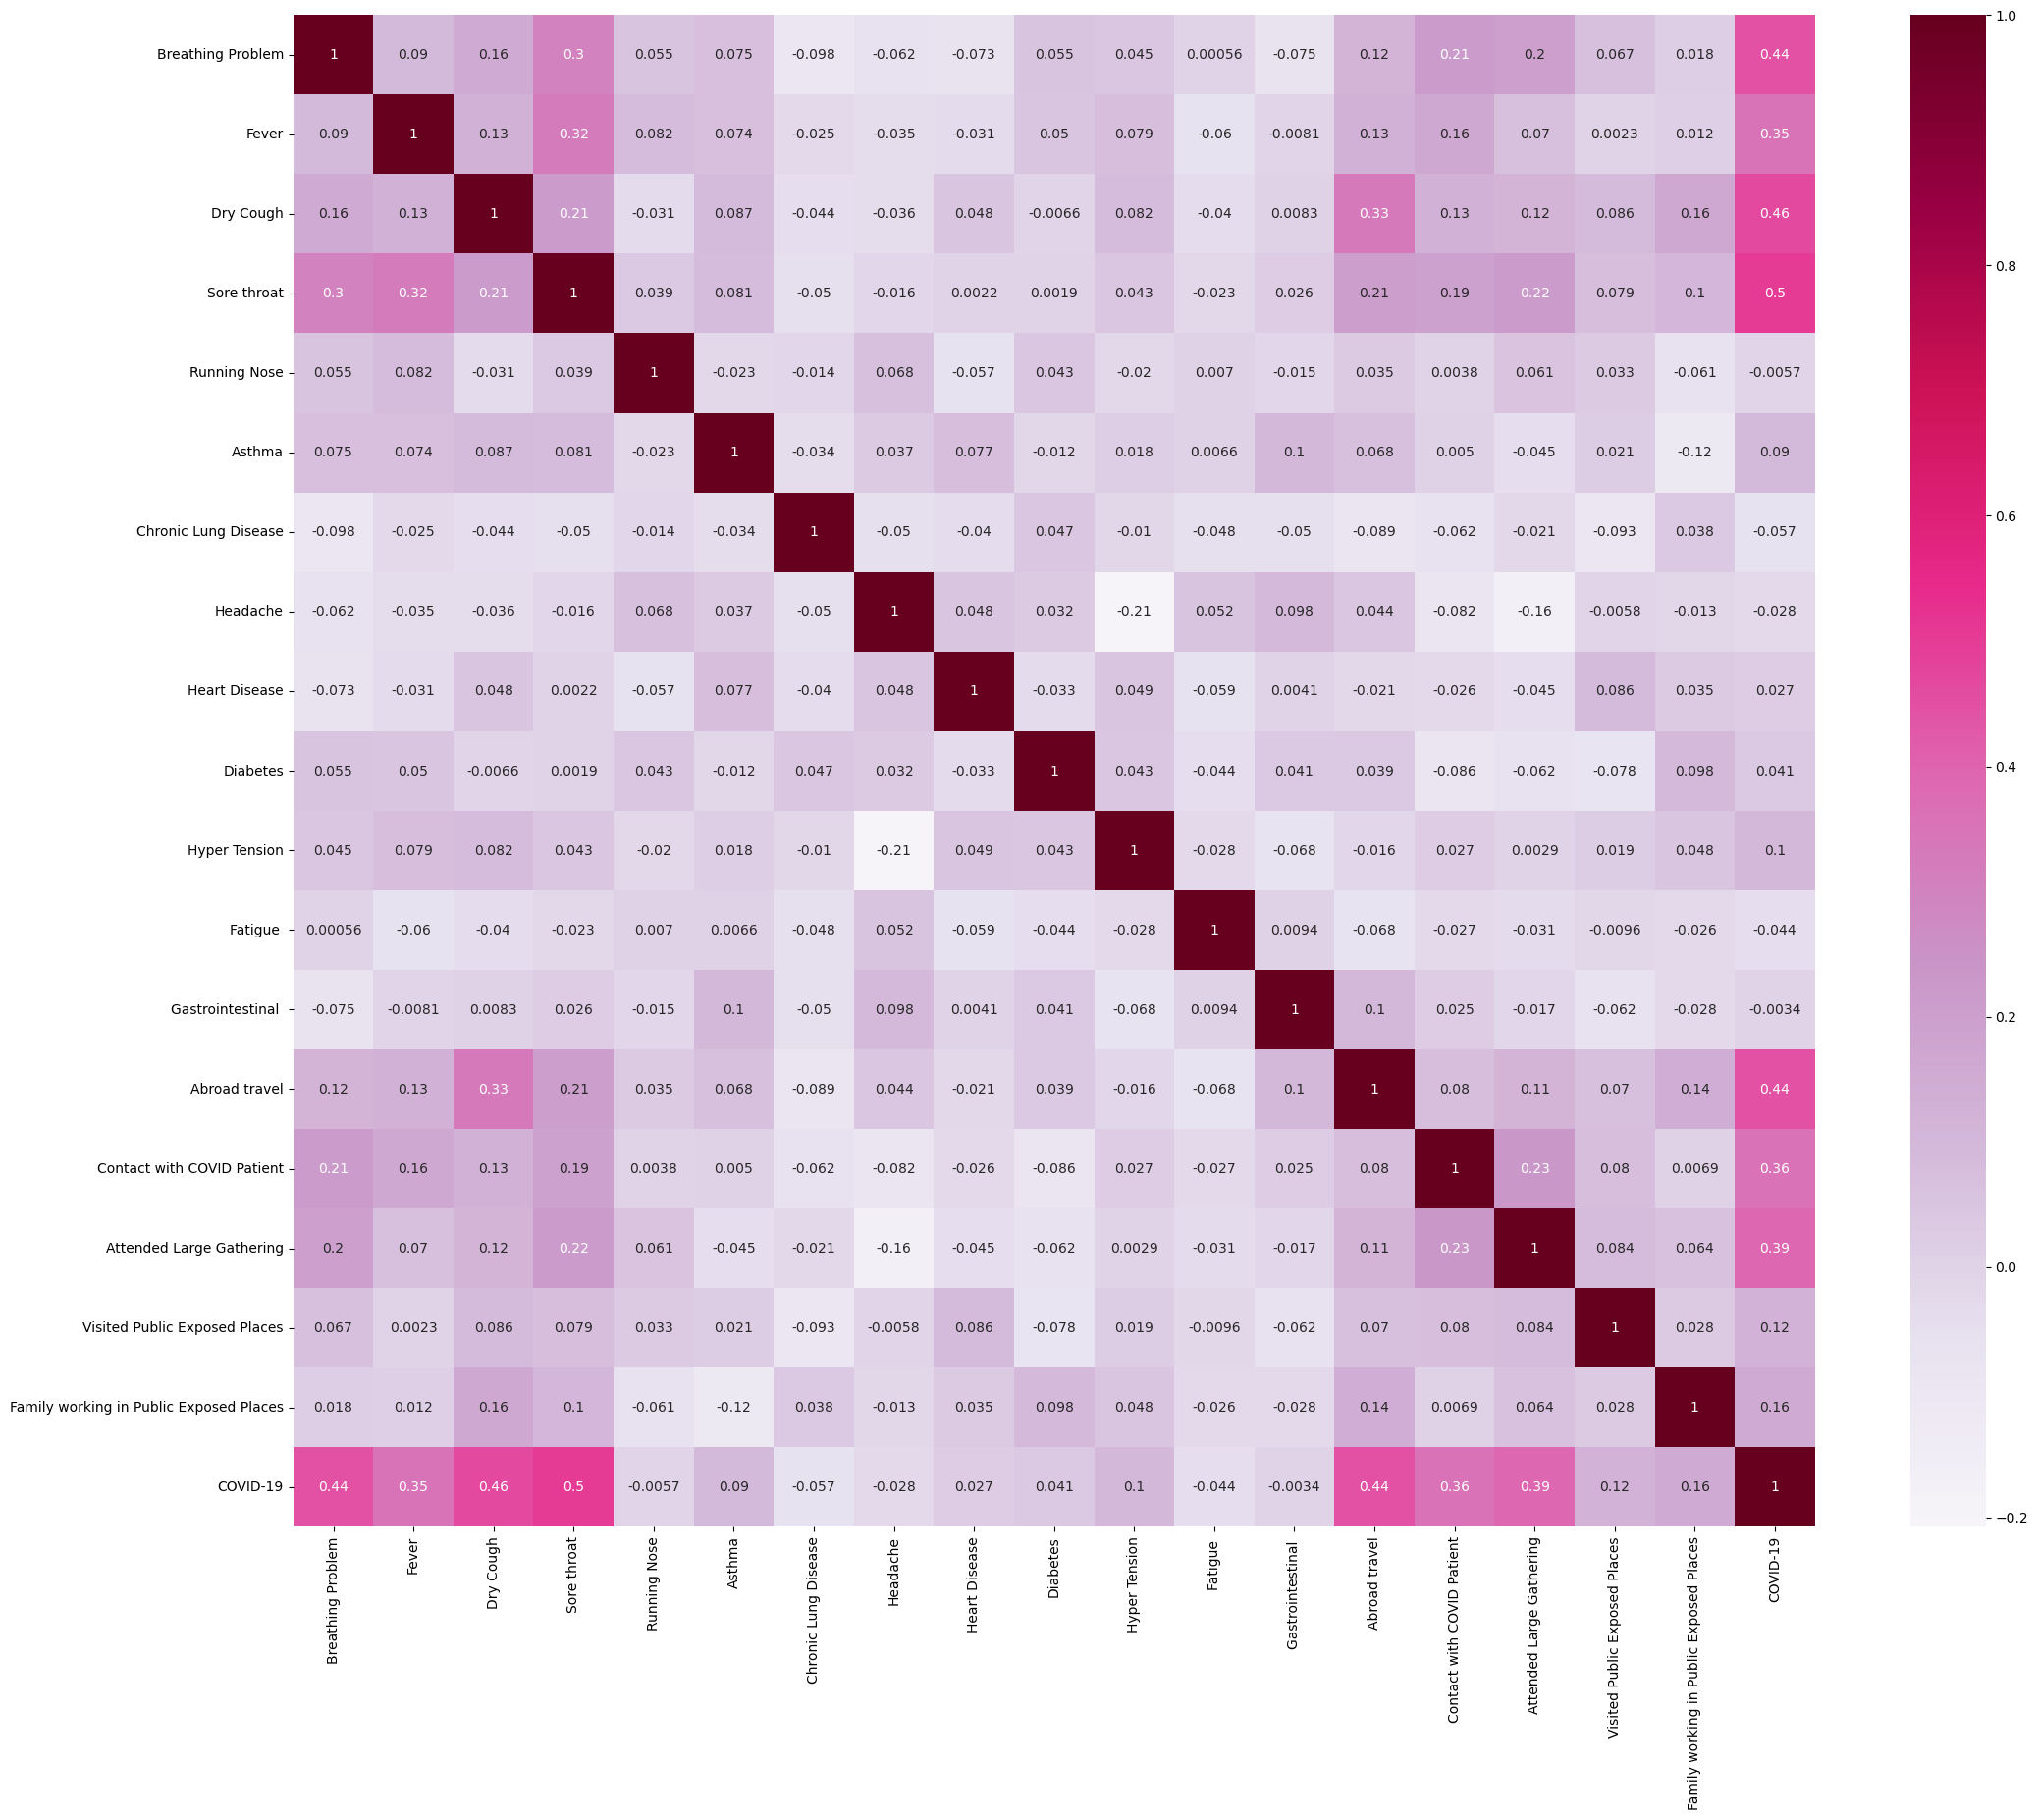

In [81]:
# Creating a new figure for the heatmap with specified size
# 'plt' is an alias for matplotlib.pyplot library
# 'figure(figsize=(25,20))' specifies the size of the figure (width, height) in inches
plt.figure(figsize=(25,20))

# Generating a heatmap to visualize the correlation matrix of the COVID-19 data
# 'sns' is an alias for seaborn library
# 'heatmap' is a seaborn function to plot rectangular data as a color-encoded matrix
# 'covid_data.corr()' calculates the correlation matrix of the DataFrame 'covid_data'
# 'annot=True' displays the correlation values on the heatmap
# 'cmap="PuRd"' specifies the colormap to be used for the heatmap
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")

In [82]:
# Extracting features (independent variables) by dropping the 'COVID-19' column
# 'x' is assigned the DataFrame with 'COVID-19' column dropped
# 'covid_data' is a DataFrame containing COVID-19 data
# 'drop' method is used to remove columns
# 'axis=1' specifies that we are dropping a column (1 for column, 0 for row)
x = covid_data.drop('COVID-19', axis=1)

# Extracting target variable (dependent variable)
# 'y' is assigned the 'COVID-19' column
# 'covid_data' is a DataFrame containing COVID-19 data
# 'COVID-19' is the target variable to be predicted
y = covid_data['COVID-19']

# Splitting the dataset into training and testing sets
# 'train_test_split' is a function from sklearn.model_selection
# 'x_train' and 'x_test' contain the features for training and testing respectively
# 'y_train' and 'y_test' contain the target variable for training and testing respectively
# 'test_size=0.20' specifies the proportion of the dataset to include in the test split
# 'random_state=101' sets the seed for random shuffling to ensure reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [83]:
# Initializing dictionaries to store performance metrics for different algorithms
# 'accuracies' will store accuracy scores
# 'algo_time' will store execution times
# 'r2_scores' will store R-squared scores
# 'mean_squared_errors' will store mean squared errors
# 'roc_auc_scores' will store ROC AUC scores
accuracies = {}
algo_time = {}
r2_scores = {}
mean_squared_errors = {}
roc_auc_scores = {}

In [84]:
def print_performance2(yt, clf, clf_name):
    # Predicting target variable using the classifier
    y_pred = clf.predict(x_test)
    
    # Calculating and storing performance metrics
    roc_auc_scores[clf_name] = roc_auc_score(yt, y_pred) * 100
    mean_squared_errors[clf_name] = mean_squared_error(yt, y_pred) * 100
    r2_scores[clf_name] = r2_score(yt, y_pred) * 100
    accuracies[clf_name] = clf.score(x_train, y_train) * 100
    
    # Printing performance metrics
    print('ROC_AUC value:', roc_auc_scores[clf_name], "%", '\n')
    print("Mean Squared Error:", mean_squared_errors[clf_name], "%")
    print("\nR2 score is:", r2_scores[clf_name], "%")
    print("\nAccuracy Score:", accuracies[clf_name], "%")
    print('\nClassification Report: ','\n', classification_report(yt, y_pred))
    
    # Generating and plotting confusion matrix
    confusionmatrix = confusion_matrix(yt, y_pred)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i, s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

## LOGISTIC REGRESSION 

LOGISTIC REGRESSION
ROC_AUC value: 93.23107498945218 % 

Mean Squared Error: 3.035878564857406 %

R2 score is: 80.08627006861634 %

Accuracy Score: 97.03243616287095 %

Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087



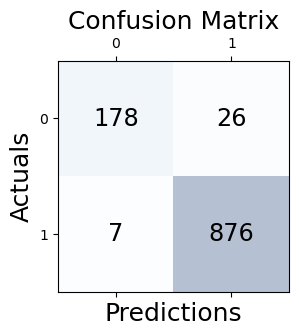

In [85]:
print("LOGISTIC REGRESSION")

# Starting timer to measure execution time
start = time.time()

# Initializing and training Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Ending timer
end = time.time()

# Printing performance metrics and generating confusion matrix
print_performance2(y_test, lr, 'LOGISTIC REGRESSION')

# Calculating and storing execution time
algo_time['LOGISTIC REGRESSION'] = end - start

# Viewing Some Metrices

In [86]:
import plotly.express as px

# Creating a scatter plot using Plotly Express
# 'list(accuracies.keys())' and 'list(accuracies.values())' convert dictionary keys and values to lists respectively
# 'x' specifies the x-axis values (model names)
# 'y' specifies the y-axis values (accuracy scores)
fig = px.scatter(x=list(accuracies.keys()), y=list(accuracies.values()))

# Customizing trace (markers) appearance
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)

# Customizing layout of the plot
fig.update_layout(title="Accuracy Comparison", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

In [87]:
import plotly.express as px

# Creating a scatter plot using Plotly Express
# 'list(algo_time.keys())' and 'list(algo_time.values())' convert dictionary keys and values to lists respectively
# 'x' specifies the x-axis values (model names)
# 'y' specifies the y-axis values (execution times)
fig = px.scatter(x=list(algo_time.keys()), y=list(algo_time.values()))

# Customizing trace (markers) appearance
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)

# Customizing layout of the plot
fig.update_layout(title="Algorithm Time Comparison", xaxis_title="Model", yaxis_title="Execution Time")

In [88]:
import plotly.graph_objects as go

# Extracting algorithm names from keys of 'roc_auc_scores' dictionary
Algos = list(roc_auc_scores.keys())

# Creating a figure with multiple bar plots using Plotly Graph Objects
fig = go.Figure(data=[
    go.Bar(name='Accuracies', x=Algos, y=list(accuracies.values())),
    go.Bar(name='R2 Scores', x=Algos, y=list(r2_scores.values())),
    go.Bar(name='Mean Squared Errors', x=Algos, y=list(mean_squared_errors.values())),
    go.Bar(name='ROC AUC Scores', x=Algos, y=list(roc_auc_scores.values()))
])

# Setting the bar mode to 'group' for grouped bars
fig.update_layout(barmode='group')

# Prediction Model

In [89]:
import colorama
from colorama import Fore

print("COVID PREDICTION BASED ON ML ALGORITHMS")
print("Enter 1 for Yes and 0 for No")

# Gathering input data from the user
Breathing_Problem = int(input("Does the patient have breathing problem? "))
Fever = int(input("Does the patient have fever? "))
Dry_Cough = int(input("Does the patient have dry cough? "))
Sore_throat = int(input("Does the patient have sore throat? "))
Running_Nose = int(input("Does the patient have running nose? ")) 
Asthma = int(input("Does the patient have any record of asthma? ")) 
Chronic_Lung_Disease = int(input("Does the patient have any records of chronic lung disease? ")) 
Headache = int(input("Is the patient having headache? "))
Heart_Disease = int(input("Does the patient have any record of any heart disease? "))
Diabetes = int(input("Does the patient have diabetes? "))
Hyper_Tension = int(input("Does the patient have hyper tension? ")) 
Fatigue = int(input("Does the patient experience fatigue? "))
Gastrointestinal = int(input("Does the patient have any gastrointestinal disorders? "))
Abroad_travel = int(input("Has the patient travelled abroad recently? "))
Contact_with_COVID_Patient = int(input("Was the patient in contact with a COVID patient recently? "))
Attended_Large_Gathering = int(input("Did the patient attend any large gathering event recently? "))
Visited_Public_Exposed_Places = int(input("Did the patient visit any public exposed places recently? "))
Family_working_in_Public_Exposed_Places = int(input("Does the patient have any family member working in public exposed places? "))

# Creating a patient data point
patient = [[Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places]]

# Predicting using the trained Logistic Regression model
result = lr.predict(patient)
print("\nResults: ", result)

# Providing diagnosis based on prediction
if result == 1:
    print(Fore.RED + 'You may be affected with COVID-19 virus! Please get an RT-PCR test ASAP and stay in quarantine for 14 days!')
    print()
else:
    print(Fore.GREEN + 'You do not have any symptoms of COVID-19. Stay home! Stay safe!')
    print()

COVID PREDICTION BASED ON ML ALGORITHMS
Enter 1 for Yes and 0 for No
Does the patient have breathing problem? 0
Does the patient have fever? 0
Does the patient have dry cough? 0
Does the patient have sore throat? 0
Does the patient have running nose? 0
Does the patient have any record of asthma? 0
Does the patient have any records of chronic lung disease? 0
Is the patient having headache? 0
Does the patient have any record of any heart disease? 0
Does the patient have diabetes? 0
Does the patient have hyper tension? 0
Does the patient experience fatigue? 0
Does the patient have any gastrointestinal disorders? 0
Has the patient travelled abroad recently? 0
Was the patient in contact with a COVID patient recently? 0
Did the patient attend any large gathering event recently? 0
Did the patient visit any public exposed places recently? 0
Does the patient have any family member working in public exposed places? 0

Results:  [0]
You do not have any symptoms of COVID-19. Stay home! Stay safe!


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

